In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [17]:
# compute the number of labels: [0, 1, ..., 9]
num_labels = len(np.unique(y_train))

# convert to one-hot vector: e.g., 2 -> [0, 0, 1, ..., 0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [19]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 1.5807 - accuracy: 0.4390
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2494 - accuracy: 0.5621
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1352 - accuracy: 0.6031
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0564 - accuracy: 0.6323
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9924 - accuracy: 0.6560
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9405 - accuracy: 0.6755
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.8931 - accuracy: 0.6891
Epoch 8/20
391/391 [==============================] - 2s 6ms/step - loss: 0.8496 - accuracy: 0.7056
Epoch 9/20
391/391 [==============================] - 2s 6ms/step - loss: 0.8191 - accuracy: 0.7163
Epoch 10/20
391/391 [==============================] - 2s 5ms/step - loss: 0.7730 - accuracy: 0.7328

In [21]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.1518 - accuracy: 0.6484
Test accuracy: 0.6484000086784363


In [22]:
model_2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [23]:
model_2.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model_2.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
391/391 [==============================] - 5s 10ms/step - loss: 1.7725 - accuracy: 0.3455
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 1.4589 - accuracy: 0.4772
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3426 - accuracy: 0.5204
Epoch 4/20
391/391 [==============================] - 4s 11ms/step - loss: 1.2645 - accuracy: 0.5487
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 1.2123 - accuracy: 0.5717
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1676 - accuracy: 0.5903
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1305 - accuracy: 0.6039
Epoch 8/20
391/391 [==============================] - 4s 11ms/step - loss: 1.0949 - accuracy: 0.6137
Epoch 9/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0770 - accuracy: 0.6200
Epoch 10/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0609 - accura

In [25]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.7967 - accuracy: 0.7330
Test accuracy: 0.7329999804496765


In [26]:
history = model_2.fit(x_train, y_train, epochs=75, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/75
391/391 [==============================] - 5s 12ms/step - loss: 0.9101 - accuracy: 0.6815 - val_loss: 0.8055 - val_accuracy: 0.7241
Epoch 2/75
391/391 [==============================] - 4s 10ms/step - loss: 0.9119 - accuracy: 0.6803 - val_loss: 0.8183 - val_accuracy: 0.7222
Epoch 3/75
391/391 [==============================] - 5s 12ms/step - loss: 0.9001 - accuracy: 0.6836 - val_loss: 0.7715 - val_accuracy: 0.7396
Epoch 4/75
391/391 [==============================] - 4s 11ms/step - loss: 0.8867 - accuracy: 0.6881 - val_loss: 0.7946 - val_accuracy: 0.7367
Epoch 5/75
391/391 [==============================] - 4s 10ms/step - loss: 0.8897 - accuracy: 0.6883 - val_loss: 0.7724 - val_accuracy: 0.7346
Epoch 6/75
391/391 [==============================] - 5s 12ms/step - loss: 0.8778 - accuracy: 0.6903 - val_loss: 0.7840 - val_accuracy: 0.7289
Epoch 7/75
391/391 [==============================] - 5s 12ms/step - loss: 0.8763 - accuracy: 0.6935 - val_loss: 0.7625 - val_accuracy: 0.7355

In [37]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.6460 - accuracy: 0.7761
Test accuracy: 0.7760999798774719


{'verbose': 1, 'epochs': 75, 'steps': 391}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


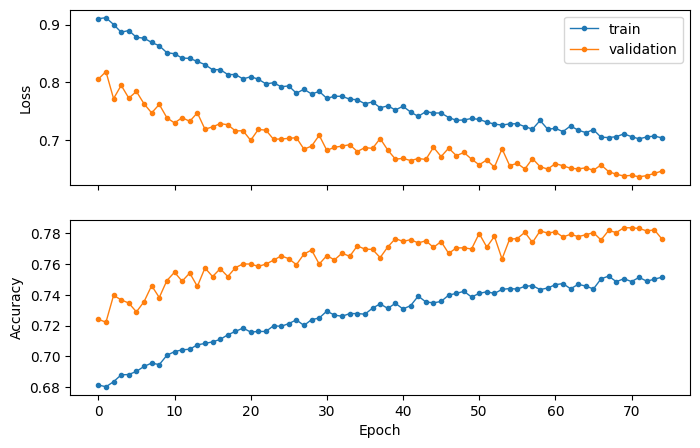

In [27]:
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

In [29]:
model_3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [30]:
model_3.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model_3.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 0.9369 - accuracy: 0.6720 - val_loss: 0.7876 - val_accuracy: 0.7323
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.9243 - accuracy: 0.6798 - val_loss: 0.7738 - val_accuracy: 0.7399
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 0.9080 - accuracy: 0.6833 - val_loss: 0.8128 - val_accuracy: 0.7272
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.8950 - accuracy: 0.6850 - val_loss: 0.8174 - val_accuracy: 0.7190
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.8865 - accuracy: 0.6903 - val_loss: 0.7796 - val_accuracy: 0.7298
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.8779 - accuracy: 0.6923 - val_loss: 0.7994 - val_accuracy: 0.7364
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 0.8801 - accuracy: 0.6882 - val_loss: 0.7560 - val_accuracy: 0.7441
Epoch 

{'verbose': 1, 'epochs': 50, 'steps': 782}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


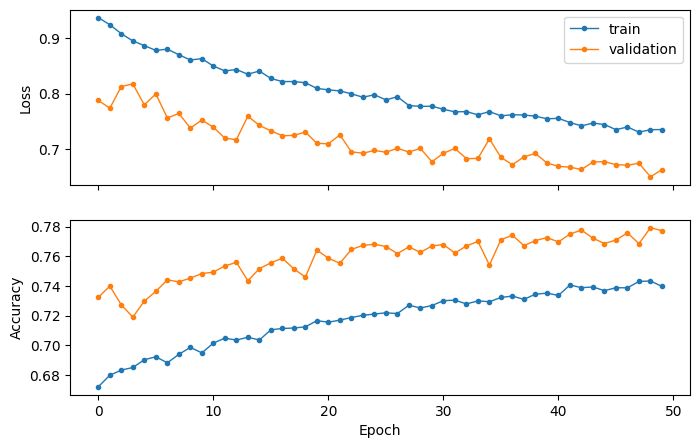

In [36]:
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

In [35]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6628 - accuracy: 0.7772
Test accuracy: 0.7771999835968018
